**1. Importing Libraries**
**The script begins by importing essential libraries:**

**NumPy is used for numerical operations and data manipulation.**

**TensorFlow provides tools for building and training deep learning models.**

**Keras layers like Conv2D, MaxPooling2D, Dense, and others define the model architecture.**

**ModelCheckpoint ensures the best model weights are saved during training.**

**Sklearn's train_test_split splits the dataset into training and validation sets.**

**Datetime records the time taken for model training.**

**These libraries simplify various tasks, including data preprocessing, model design, and performance evaluation.**

**2. Loading and Normalizing the CIFAR-10 Dataset**
**The CIFAR-10 dataset is loaded using TensorFlow's built-in keras.datasets.cifar10 module. This dataset contains 60,000 images across 10 classes, with 50,000 used for training and 10,000 for testing.**

**To improve training efficiency, the pixel values of the images are normalized by dividing each pixel value by 255.0, scaling them to the range [0, 1]. This step helps the model converge faster and ensures numerical stability during training.**

**3. One-Hot Encoding Labels**
**The dataset labels are categorical integers (0-9), representing the 10 classes. These labels are converted into a one-hot encoded format using Keras’ to_categorical. For example, a label 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This transformation ensures the model predicts probabilities for each class during multi-class classification.**

**4. Splitting the Dataset**
**The training data is split into training and validation sets using train_test_split.**

**80% of the training data is used for actual training.**
**20% of the training data is reserved for validation to monitor model performance and prevent overfitting. A fixed random_state ensures reproducibility.**

**5. Defining the CNN Model Architecture**
**The CNN is defined as a sequence of layers using the Sequential API. Key components include:**

**Input and First Convolution Block: The input layer accepts images of size 32x32x3 (RGB). Two convolutional layers with ReLU activation extract features. Batch normalization stabilizes learning, and dropout reduces overfitting. MaxPooling downsamples feature maps, reducing computational complexity.**
**Second and Third Convolution Blocks: These blocks progressively increase the number of filters (64 and 128, respectively) for more complex feature extraction. Dropout layers with higher rates (0.3 and 0.4) are added to manage overfitting.**
**Fully Connected Layers: Flattening converts the 2D feature maps into 1D arrays, followed by two dense layers with ReLU activation and dropout (0.5). These layers integrate learned features.**
**Output Layer: A dense layer with 10 neurons and softmax activation outputs class probabilities for the 10 categories.**

**6. Compiling the Model**
**The model is compiled with:**

**Adam Optimizer: A popular gradient-based optimizer with an adaptive learning rate, improving training speed.**
**Categorical Cross-Entropy Loss: Calculates the difference between predicted and actual class probabilities, guiding model updates.**
**Accuracy Metric: Monitors the percentage of correctly classified images during training and evaluation.**

**7. Model Summary**
**The model.summary() function prints the architecture, displaying the layers, the number of parameters, and the total trainable parameters. This overview helps verify the model's structure before training.**

**8. Training the Model**
**The model is trained over 300 epochs with a batch size of 64. Key features of the training process:**

**Validation Monitoring: The validation data monitors the model’s performance after each epoch.**
**ModelCheckpoint: Saves the model with the lowest validation loss during training, ensuring only the best model is retained.**
**Training Time: datetime measures the total time taken for training.**

**9. Evaluating the Model**
**After training, the model's performance is evaluated on the test set. The evaluate function calculates:**

**Test Loss: Quantifies the difference between predicted and actual outputs on the test data.**
**Test Accuracy: Measures the percentage of correct predictions, providing a final metric for model performance.**

**10. Final Output**
**The test accuracy and training duration are printed. These metrics validate the model's effectiveness and efficiency in classifying CIFAR-10 images.**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from datetime import datetime

# Load CIFAR-10 dataset
(X, y), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize data
X = X.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
model = Sequential()

# Input layer and first convolution block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  # First MaxPooling
model.add(Dropout(0.25))

# Second convolution block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  # Second MaxPooling
model.add(Dropout(0.3))

# Third convolution block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))  # Third MaxPooling - Changed to padding='same'
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_function = 'categorical_crossentropy'
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Model summary
model.summary()

# Training the model
checkpointer = ModelCheckpoint(filepath='cifar10_enhanced_cnn_model.keras', verbose=1, save_best_only=True)

start = datetime.now()

num_epochs = 300
batch_size = 64

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_val, y_val),
    callbacks=[checkpointer],
    verbose=1
)

duration = datetime.now() - start
print("Training completed in time: ", duration)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │              

 Total params: 355,114 (1.35 MB)

 Trainable params: 354,666 (1.35 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/300
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2128 - loss: 2.1545
Epoch 1: val_loss improved from inf to 1.56559, saving model to cifar10_enhanced_cnn_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.2129 - loss: 2.1541 - val_accuracy: 0.4368 - val_loss: 1.5656
Epoch 2/300
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4292 - loss: 1.5637
Epoch 2: val_loss improved from 1.56559 to 1.26347, saving model to cifar10_enhanced_cnn_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.4295 - loss: 1.5631 - val_accuracy: 0.5503 - val_loss: 1.2635
Epoch 3/300
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5318 - loss: 1.3336
Epoch 3: val_loss improved from 1.26347 to 1.19827, saving model to cifar10_enhanced_cnn_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5319 - loss: 1.3335 - val_accuracy: 0.5762 - val_loss: 1.1983
Epoch 4/300
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5892 - loss: 1.2022

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


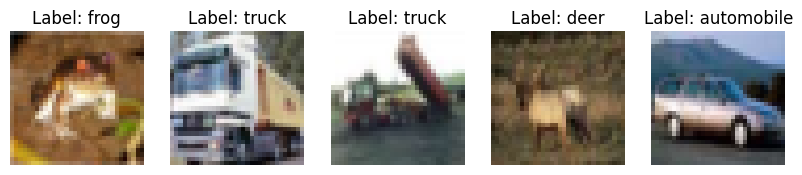

First few labels (numeric format): [[6]
 [9]
 [9]
 [4]
 [1]]
First few labels (class names): ['frog', 'truck', 'truck', 'deer', 'automobile']


In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load CIFAR-10 dataset
(X, y), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Display the first 5 images in the training dataset
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)  # Create subplots for each image
    plt.imshow(X[i])  # Display image
    plt.title(f"Label: {class_names[y[i][0]]}")  # Show the label for each image
    plt.axis('off')  # Hide axes for better visualization

plt.show()

# Print the first few labels to verify
print("First few labels (numeric format):", y[:5])
print("First few labels (class names):", [class_names[label[0]] for label in y[:5]])

**1. CIFAR-10 Class Names**
**The class_names list maps numerical class indices (0-9) to their corresponding class names in the CIFAR-10 dataset:**

**Index 0 to 9 corresponds to categories such as 'airplane', 'automobile', 'bird', etc. This mapping is used to translate numerical predictions from the model into meaningful labels.**

**2. Defining the predict_image Function**
**This function processes an input image and predicts its class using the trained model. Steps include:**

**Normalization: The input image is scaled by dividing its pixel values by 255.0, ensuring consistency with the training data.**
**Batch Dimension Expansion: Keras models expect input in batches, so the function uses np.expand_dims to add a batch dimension to the image.**
**Prediction: The processed image is passed through the model using model.predict, generating probabilities for each class.**
**Class Index Extraction: The predicted class index is determined using np.argmax, which selects the index with the highest probability.**
**Class Name Mapping: The numerical index is mapped to its corresponding name using the class_names list, providing a human-readable output.**

**3. Example Usage**
**An example demonstrates how to use the predict_image function:**

**A random image is selected from the test dataset using np.random.randint.**
**The function predicts the class of this randomly chosen image and prints its corresponding class name. This provides a practical and visual evaluation of the model's prediction capabilities.**

In [ ]:
# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def predict_image(image, model):
    image = image.astype('float32') / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)    # Expand dimensions for batch
    predictions = model.predict(image)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    return class_names[predicted_class_index]

# Example usage
random_index = np.random.randint(0, X_test.shape[0])
test_image = X_test[random_index]
predicted_class_name = predict_image(test_image, model)
print(f'Predicted class: {predicted_class_name}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: deer


In [ ]:
from tabulate import tabulate

# Data for the table
data = [
    ["Data Loading", "CIFAR-10 dataset using tf.keras.datasets.cifar10.load_data()",
     "Training data (X, y) and test data (X_test, y_test)",
     "The dataset consists of 60,000 images (50,000 training, 10,000 testing), each labeled into one of 10 categories."],
    ["Data Normalization", "Pixel values of images in X and X_test",
     "Scaled pixel values between 0 and 1",
     "Scaling improves numerical stability and optimizes model convergence."],
    ["One-Hot Encoding", "Labels y and y_test",
     "One-hot encoded labels",
     "Encodes categorical labels into a binary format required for the loss function."],
    ["Train/Validation Split", "Training data (X, y)",
     "Split into (X_train, y_train) and (X_val, y_val) with an 80-20 ratio",
     "Helps monitor validation accuracy during training to detect overfitting."],
    ["Model Architecture", "Sequential CNN layers",
     "Model structure printed via model.summary()",
     "Includes convolution, pooling, dropout, and dense layers optimized for image classification."],
    ["Compilation", "Optimizer (Adam), loss function (categorical_crossentropy), and metrics (accuracy)",
     "Compiled model ready for training",
     "The optimizer controls gradient updates, and the loss function measures prediction error."],
    ["Training", "Training data (X_train, y_train) with 300 epochs and batch size 64",
     "Training history, including loss and accuracy metrics",
     "Validation loss and accuracy trends show how well the model generalizes."],
    ["Evaluation", "Test data (X_test, y_test)",
     "Test accuracy of the trained model",
     "The model achieves high accuracy on unseen data, indicating its generalization performance."],
    ["Prediction", "A random test image",
     "Predicted class name for the image",
     "Demonstrates the model's inference capability and correctness by mapping the output label to its corresponding class name."]
]

# Column headers
headers = ["Step", "Input", "Output", "Observations"]

# Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))


+------------------------+------------------------------------------------------------------------------------+----------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------+
| Step                   | Input                                                                              | Output                                                               | Observations                                                                                                               |
+========================+====================================================================================+======================================================================+============================================================================================================================+
| Data Loading           | CIFAR-10 dataset using tf.keras.datasets.cifar10.